In [1]:
from os import listdir, mkdir
from os.path import join, isfile, isdir, exists, expanduser
from keras.preprocessing import image
from keras.models import load_model, model_from_json
from keras import optimizers, regularizers, models, layers
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


### Directory constants

In [11]:
project_dir_name = join('desktop','Esri Project')
data_dir = join(expanduser('~'),  project_dir_name, 'original data 2')
model_path =  join(expanduser('~'),  project_dir_name, 'models', 'roads_model_road_detector.h5');
image_path = join(expanduser('~'),  project_dir_name, 'datasets', 'redlands roads dataset', 'roads' , 'image_3.jpg');
# image_path = join(expanduser('~'),  project_dir_name, 'temp data','temp sliced', 'map sliced','image_159.jpg');

### Load image

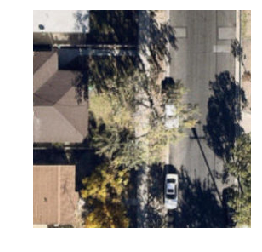

In [12]:
IMAGE_SIZE = 256
img = image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
img_tensor = image.img_to_array(img)
img_tensor = img_tensor.reshape((1,) + img_tensor.shape)
img_tensor /= 255. 
plt.imshow(img)
plt.axis('off')
plt.show()

### Predict single image with model

In [13]:
model = load_model(model_path)
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
model.summary()
predictions = model.predict(img_tensor)
print(predictions)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4194432   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 18,909,249
Trainable params: 4,194,561
Non-trainable params: 14,714,688
_________________________________________________________________
[[ 0.05477216]]


### Predict images with model

In [ ]:
classes = [dname for dname in listdir(data_dir) if isdir(join(data_dir, dname))]
model = load_model(model_path)
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
model.summary()
predictions = model.predict(img_tensor)[0]
max_val = np.amax(predictions)
max_index = np.argmax(predictions)

for idx, pred in enumerate(predictions):
    print('class:' + classes[idx] + ', accuracy:' + str(pred))  

print('\nMax Accuracy:')    
print('class:' + classes[max_index] + ', accuracy:' + str(max_val))  
